In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
from sklearn.preprocessing import StandardScaler # 표준화(평균을 기준)
from sklearn.preprocessing import MinMaxScaler # 정규화(정해진 규칙 기준, mix-max기준)
from sklearn.datasets import load_iris

In [5]:
import time
from IPython.display import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
# cross_val_score: 다양한 샘플링으 ㄹ해서 여러번 테스트 --> 평균치를 구해본다.!
from sklearn.metrics import *
%matplotlib inline

# 주요 라이브러리 import

from matplotlib import rc, font_manager
import matplotlib.font_manager as fm


# 디렉토리 및 파일 이름에 맞추어 변경
font_location = '../NanumGothic.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)

In [6]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [7]:
type(iris) # dic을 wrapping(boxing) class

sklearn.utils.Bunch

In [8]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [9]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [10]:
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [11]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [12]:
len(iris.target)

150

In [13]:
df = pd.DataFrame(data = iris.data, #2nd array
             columns=iris.feature_names, #list
)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [14]:
df['species'] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [15]:
df['species'] = df['species'].astype('category')

In [16]:
df['species'] = df['species'].cat.rename_categories(iris.target_names)
df['species'] #

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: category
Categories (3, object): ['setosa', 'versicolor', 'virginica']

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   species            150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


In [18]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [19]:
##df = pd.get_dummies(df)

In [20]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [21]:
df.groupby('species').size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

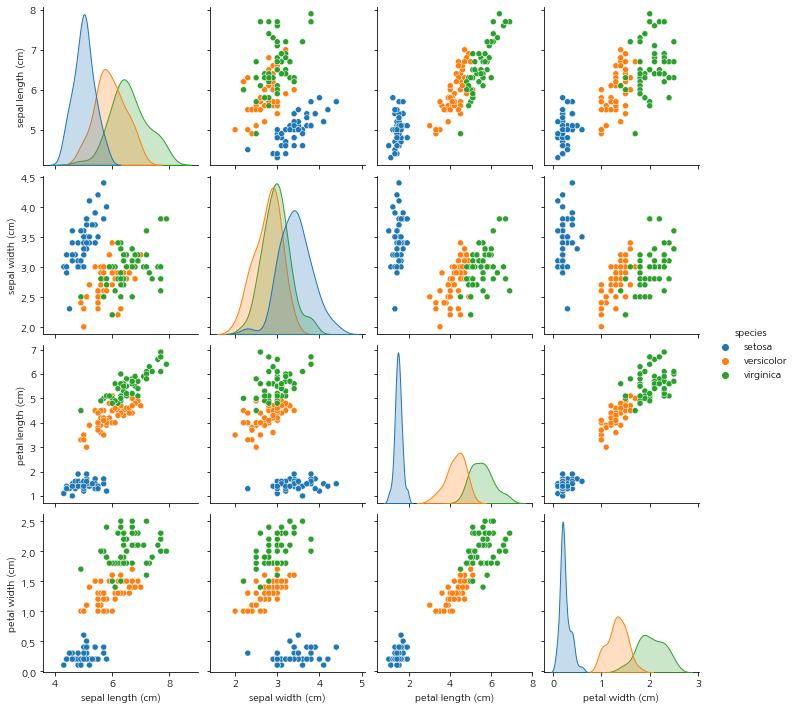

In [22]:
##pairplot
sns.pairplot(df, hue = 'species')

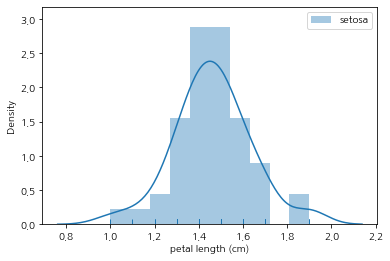

In [23]:
sns.distplot(df[df.species=="setosa"]["petal length (cm)"], hist=True, rug = True, label="setosa")
plt.legend() #범례

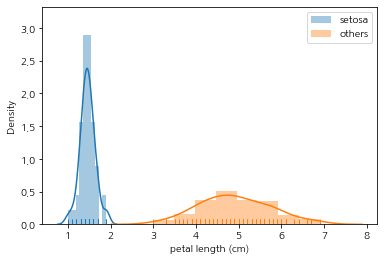

In [24]:
sns.distplot(df[df.species == "setosa"]["petal length (cm)"], hist=True, rug=True, label="setosa")
sns.distplot(df[df.species != "setosa"]["petal length (cm)"], hist=True, rug=True, label="others")
plt.legend()

In [25]:
## virginica, versicolor

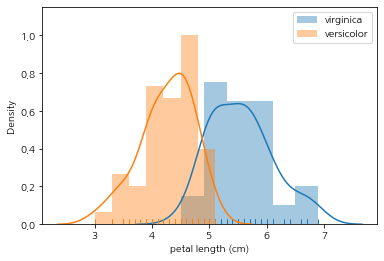

In [26]:
sns.distplot(df[df.species=="virginica"]["petal length (cm)"], hist=True, rug = True, label="virginica")
sns.distplot(df[df.species=="versicolor"]["petal length (cm)"], hist=True, rug = True, label="versicolor")
plt.legend() #범례

In [27]:
## setosa가 꽃잎의 길이가 제일 짧다, virginica가 제일 길다.
## 꽃잎의 길이 1.5 전후 짧은 것은 모두다 setosa이다. 
## verginia가 versicolor 보다는 꽃잎의 길이가 약간 긴 편이지만, 
## 종을 판별하기 위한 절대적인 기준은 되지 않는다.

In [28]:
## petal width, 3개의 품종을 비교

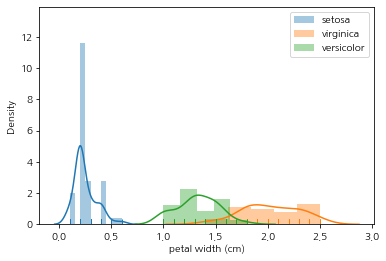

In [29]:
sns.distplot(df[df.species=="setosa"]["petal width (cm)"], hist=True, rug = True, label="setosa")
sns.distplot(df[df.species=="virginica"]["petal width (cm)"], hist=True, rug = True, label="virginica")
sns.distplot(df[df.species=="versicolor"]["petal width (cm)"], hist=True, rug = True, label="versicolor")
plt.legend() #범례

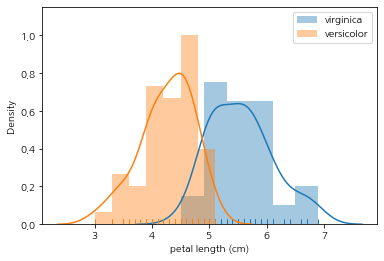

In [30]:
sns.distplot(df[df.species == "virginica"]["petal length (cm)"], hist=True, rug=True, label="virginica")
sns.distplot(df[df.species == "versicolor"]["petal length (cm)"], hist=True, rug=True, label="versicolor")
plt.legend()
plt.show()

In [31]:
# 꽃잎의 너비를 비교 결과, setosa가 제일 작은 꽃임.
# 전체적인 꽃잎의 크기는 verginica가 제일 크다
# 꽃잎의 너비가 다른 꽃보다 상대적으로 많이 setosa가 작으므로, 
# 꽃잎의 너비 1미만은 모두 setosa!
# 꽃잎의 너비는 iris에 품종을 분류하기에 적합한 항목이 됨.

In [32]:
from pandas.plotting import parallel_coordinates

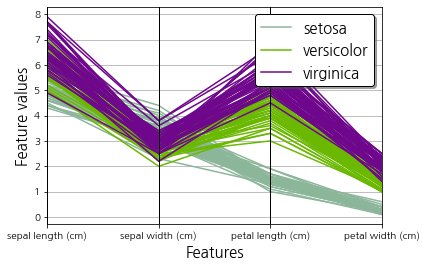

In [33]:
parallel_coordinates(df, "species") ##dataframe, target
plt.xlabel('Features', fontsize=15)
plt.ylabel('Feature values', fontsize=15)
plt.legend(loc=1, prop={'size': 15}, frameon=True, shadow=True, facecolor="white", edgecolor="black")
plt.show()

In [34]:
## petal width, petal length 는 학습의 중요 속성이 될 예정이므로 사용
## sepal width, sepal length 는 중요 속성이 아니므로 제거해도 될 것 같음

In [35]:
## sepal length, sepal width 각각 항목별로 꽃들이 어떤 차이를 가지는지
## 의 범위를 표준화 시켜 비교해본다

In [36]:
ss = StandardScaler() #표준(평균값 기준)

In [37]:
## 표준화를 기준으로 인코딩을 하려고 함
## fit->transform, fir_transform


In [38]:
X_train, X_test, y_train, y_test = train_test_split(
    df.iloc[:,:-1],# 문제
    df.iloc[:,-1],# 정답, 
    test_size = 0.2,# 테스트 비율, 
    random_state = 42,# 랜덤 시드값
)

In [39]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(120, 4) (30, 4)
(120,) (30,)


In [40]:
y_test.index

Int64Index([ 73,  18, 118,  78,  76,  31,  64, 141,  68,  82, 110,  12,  36,
              9,  19,  56, 104,  69,  55, 132,  29, 127,  26, 128, 131, 145,
            108, 143,  45,  30],
           dtype='int64')

In [41]:
y_test

73     versicolor
18         setosa
118     virginica
78     versicolor
76     versicolor
31         setosa
64     versicolor
141     virginica
68     versicolor
82     versicolor
110     virginica
12         setosa
36         setosa
9          setosa
19         setosa
56     versicolor
104     virginica
69     versicolor
55     versicolor
132     virginica
29         setosa
127     virginica
26         setosa
128     virginica
131     virginica
145     virginica
108     virginica
143     virginica
45         setosa
30         setosa
Name: species, dtype: category
Categories (3, object): ['setosa', 'versicolor', 'virginica']

In [42]:
ss.fit_transform(df.iloc[:,:-1])[:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [43]:
y_test.value_counts()

virginica     11
setosa        10
versicolor     9
Name: species, dtype: int64

In [44]:
## 스케일링 할때, 전체데이터나훈련데이터로 평균(fit)를 시키고, 
## 절대 검증데이터로 fit 시키지 않는다.
## 훈련 데이터와 검증데이터의 스케일링 기준이 달라지기 때문이다. 

In [45]:
X_train_s = pd.DataFrame(ss.fit_transform(X_train), columns = X_train.columns)
X_train_s

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-1.473937,1.203658,-1.562535,-1.312603
1,-0.133071,2.992376,-1.276006,-1.045633
2,1.085898,0.085709,0.385858,0.289218
3,-1.230143,0.756479,-1.218701,-1.312603
4,-1.717731,0.309299,-1.390618,-1.312603
...,...,...,...,...
115,0.354517,-0.585060,0.156636,0.155733
116,-1.108246,-1.255829,0.443164,0.689673
117,-0.011174,2.098017,-1.447923,-1.312603
118,-0.011174,-1.032239,0.156636,0.022248


In [46]:
X_test_s = pd.DataFrame(ss.transform(X_test), columns = X_test.columns)
X_test_s.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.354517,-0.585060,0.557775,0.022248
1,-0.133071,1.650837,-1.161395,-1.179118
2,2.304867,-1.032239,1.818500,1.490583
3,0.232620,-0.361470,0.443164,0.422703
4,1.207795,-0.585060,0.615081,0.289218


In [47]:
ms = MinMaxScaler()

In [48]:
X_train_m = pd.DataFrame(ms.fit_transform(X_train), columns = X_train.columns)
X_test_m = pd.DataFrame(ms.transform(X_test), columns = X_test.columns)
X_train_m.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.088235,0.666667,0.000000,0.041667
1,0.411765,1.000000,0.087719,0.125000
2,0.705882,0.458333,0.596491,0.541667
3,0.147059,0.583333,0.105263,0.041667
4,0.029412,0.500000,0.052632,0.041667


In [49]:
ss_df_values = ss.fit_transform(df.iloc[:,:-1])
ss_df_values[:5]


array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [50]:
ss_df = pd.DataFrame(data = ss_df_values,
                    columns = iris.feature_names)
ss_df['species'] = df['species']
ss_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,-0.900681,1.019004,-1.340227,-1.315444,setosa
1,-1.143017,-0.131979,-1.340227,-1.315444,setosa
2,-1.385353,0.328414,-1.397064,-1.315444,setosa
3,-1.506521,0.098217,-1.283389,-1.315444,setosa
4,-1.021849,1.249201,-1.340227,-1.315444,setosa
...,...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832,virginica
146,0.553333,-1.282963,0.705921,0.922303,virginica
147,0.795669,-0.131979,0.819596,1.053935,virginica
148,0.432165,0.788808,0.933271,1.448832,virginica


In [51]:
X_test_s['species'] = 

SyntaxError: invalid syntax (3218427087.py, line 1)

In [52]:
ms_df_values = ms.fit_transform(df.iloc[:,:-1])
ms_df_values[:5]

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667]])

In [53]:
ms_df = pd.DataFrame(data = ms_df_values,
                    columns = iris.feature_names)
ms_df['species'] = df['species']
ms_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,0.222222,0.625000,0.067797,0.041667,setosa
1,0.166667,0.416667,0.067797,0.041667,setosa
2,0.111111,0.500000,0.050847,0.041667,setosa
3,0.083333,0.458333,0.084746,0.041667,setosa
4,0.194444,0.666667,0.067797,0.041667,setosa
...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,virginica
146,0.555556,0.208333,0.677966,0.750000,virginica
147,0.611111,0.416667,0.711864,0.791667,virginica
148,0.527778,0.583333,0.745763,0.916667,virginica


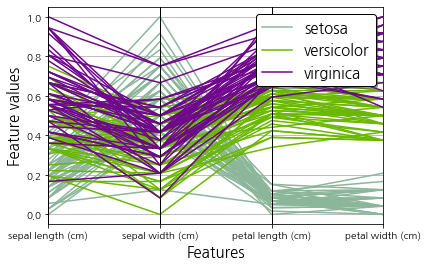

In [54]:
parallel_coordinates(ms_df, "species") ##dataframe, target
plt.xlabel('Features', fontsize=15)
plt.ylabel('Feature values', fontsize=15)
plt.legend(loc=1, prop={'size': 15}, frameon=True, shadow=True, facecolor="white", edgecolor="black")
plt.show()

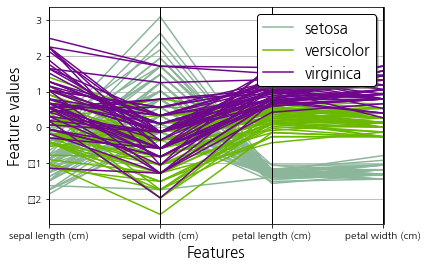

In [55]:
parallel_coordinates(ss_df, "species") ##dataframe, target
plt.xlabel('Features', fontsize=15)
plt.ylabel('Feature values', fontsize=15)
plt.legend(loc=1, prop={'size': 15}, frameon=True, shadow=True, facecolor="white", edgecolor="black")
plt.show()

<AxesSubplot:>

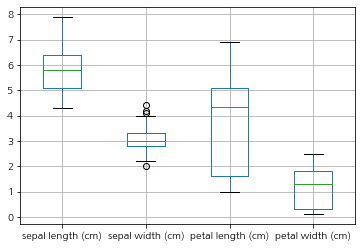

In [56]:
df.boxplot()

<AxesSubplot:>

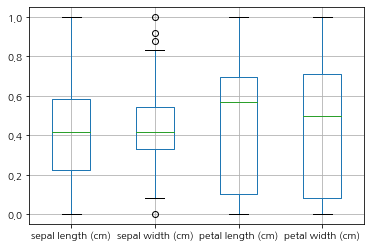

In [57]:
ms_df.boxplot()

<AxesSubplot:>

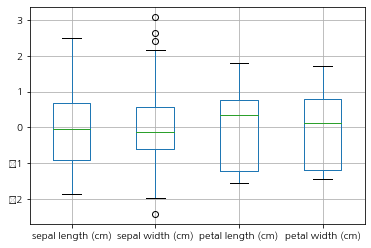

In [58]:
ss_df.boxplot()

In [59]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
# cross_val_score: 다양한 샘플링으 ㄹ해서 여러번 테스트 --> 평균치를 구해본다.!
from sklearn.metrics import *

In [60]:
knn = KNeighborsClassifier()

In [61]:
id(knn) # 참조형 knn

1949015223816

In [62]:
knn

KNeighborsClassifier()

In [63]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [64]:
# 샘플링을 10개해서, 10번 검증을 해보세요! 의미
# X_train을 train data, validation data로 나눈다.
# cv(fold값) 가 10이면 validation data를 X_train의 1/10로 잡음
# validation data의 개수는 12개, 나머지가 train data

scores = cross_val_score(knn, X_train, y_train, cv=10) #cv = fold값!
scores = list(scores)

In [65]:
scores

[0.9166666666666666,
 1.0,
 0.9166666666666666,
 1.0,
 0.8333333333333334,
 0.8333333333333334,
 1.0,
 1.0,
 1.0,
 0.9166666666666666]

In [66]:
np.mean(scores)

0.9416666666666667

In [67]:
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(
                                                    ms_df.iloc[:, :-1], #문제,
                                                    ms_df.iloc[:, -1], #정답,
                                                    test_size=0.2, #테스트 비율,
                                                    random_state=42#랜덤 시드값
)

In [68]:
def print_metrics(model, x, y, k=10):
    scores2 = list(cross_val_score(model, x, y, cv=k)) #cv = fold값
    np.set_printoptions(formatter={'float': '{: 0.3f}'.format}, suppress=True)
    print("-------------교차검증 결과-------------\n", scores2)
    acc_mean = np.mean(scores)
    print("-------------교차검증 평균-------------\n{:.3f}".format(acc_mean))
    return scores2, acc_mean

In [69]:
pred = knn.predict(X_test)
acc = accuracy_score(y_test, pred)
pred

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa'], dtype=object)

-------------교차검증 결과-------------
 [0.9583333333333334, 0.9583333333333334, 0.8333333333333334, 1.0, 0.9583333333333334]
-------------교차검증 평균-------------
0.942


(array([ 1.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  3.000,
         0.000,  1.000]),
 array([ 0.833,  0.850,  0.867,  0.883,  0.900,  0.917,  0.933,  0.950,
         0.967,  0.983,  1.000]),
 <BarContainer object of 10 artists>)

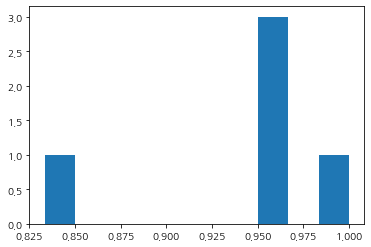

In [70]:
sc2, am2 = print_metrics(knn, X_train, y_train, 5)
plt.hist(sc2)

In [71]:
## 스케일링한 데이터로 knn fit -> 교차검증과 test data로 검증해서 비교해보세요

In [72]:
## 모델링 선정할 때, 다양한 모델을 사용 
## 교차검증을 통해서 대략적으로 선정함.
## grid search

In [73]:
grid_params = {
    'n_neighbors' : list(range(1,20)), #19개
    'weights' :["uniform", "distance"], #2개
    'metric':['euclidean', 'manhattan', 'minkowski'] #3개
} ## 19 * 2 * 3
#fold = 5,

In [74]:
gs_model = GridSearchCV(knn, grid_params, cv = 5)
gs_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19],
                         'weights': ['uniform', 'distance']})

In [75]:
gs_model.best_estimator_
# estimator(평가자, 예측자, 최적의 하이퍼파라메터가 적용된 우리가 만든 모델)

KNeighborsClassifier(metric='manhattan', n_neighbors=14)

In [76]:
gs_model.best_index_

64

In [77]:
gs_model.best_params_

{'metric': 'manhattan', 'n_neighbors': 14, 'weights': 'uniform'}

In [78]:
gs_model.best_score_

0.9666666666666666

In [79]:
gs_model = GridSearchCV(knn, grid_params, cv = 5)
gs_model.fit(X_train_m, y_train_m)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19],
                         'weights': ['uniform', 'distance']})

In [80]:
print(gs_model.best_estimator_)
print(gs_model.best_index_)
print(gs_model.best_params_)
print(gs_model.best_score_)

KNeighborsClassifier(metric='euclidean', n_neighbors=10)
18
{'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'uniform'}
0.975


In [81]:
## 그리드 서치를 통해서, 최적의 파라메터를 찾았음

In [82]:
best_knn = jBEs= KNeighborsClassifier(
    metric = 'euclidean', 
    n_neighbors = 10,
    weights ='uniform'
)
best_knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=10)

In [83]:
# {'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'uniform'}
best_knn = KNeighborsClassifier(
    metric = 'manhattan', 
    n_neighbors = 14, 
    weights = 'uniform')
best_knn.fit(X_train, y_train) #문제+답 훈련!!!

######test로 예측한 결과값######
pred3 = best_knn.predict(X_test) #모의고사=>작성한 답
acc3 = accuracy_score(y_test, pred3) #작성한 답과 실제답안지 비교
acc3

1.0

In [84]:
# {'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'uniform'}
best_knn = KNeighborsClassifier(
    metric = 'euclidean', 
    n_neighbors = 10, 
    weights = 'uniform')
best_knn.fit(X_train, y_train) #문제+답 훈련!!!

######test로 예측한 결과값######
pred3 = best_knn.predict(X_test) #모의고사=>작성한 답
acc3 = accuracy_score(y_test, pred3) #작성한 답과 실제답안지 비교
acc3

1.0

In [85]:
def print_test_metrics(model, X_test, y_test):
    print('*** Test data Accuracy ***')
    pred3 = best_knn.predict(X_test) #모의고사=>작성한 답
    acc3 = accuracy_score(y_test, pred3) #작성한 답과 실제답안지 비교
    print('{:2f}'.format(acc3))
    print('*** Confusion Matrix ***')
    print(confusion_matrix(y_test, pred3))
    print('*** Confusion Matrix(precision) ***')
    print(precision_score(y_test, pred3, average='macro'))
    print('***classification re(precision) ***')
    print(classification_report(y_test, pred))

In [86]:
print_test_metrics(knn, X_test, y_test)

*** Test data Accuracy ***
1.000000
*** Confusion Matrix ***
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
*** Confusion Matrix(precision) ***
1.0
***classification re(precision) ***
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [87]:
## 정확도는 100%
## 혼동행렬결과 3가지 분류를 완벽하게 함!
## 다음의 혼동행렬을 분석해보세요.
# ***Confusion Matrix***
#          setosa, versicolor, verginica
# setosa     [[7       2          1]
# versicolor [ 2       6          1]
# verginica  [ 1       4          6]]
# 한 열은 estimateor가 예측한 값
# 한 행은 실제 값
# 실제값이 setosa인데, 예측한 값이 setosa로 예측한 것이 7개
#                                 versicolor로 예측한 것이 2개
#                                 verginica로 예측한 것이 1개
# 정확도는(accuracy)는? 

In [88]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [89]:
total = [7,2,1,2,6,1,1,4,6]
sum(total)

30

In [90]:
print(19/30*100) # accuracy

63.33333333333333


In [91]:
# confusion matrix를 가지고, 2가지를 생각해볼 수 있다.
# 원래 실제값 중에서 어떤 것을 맞추고, 어떤 것을 못맞추었지??
# 예측한 값 중에서 어떤 것을 맞추고, 어떤 것을 못맞추었지??
## accuracy / precision/ recall
## avg(f1-score)

In [92]:
## regression(회귀): 숫자값을 예측하는 것
## 컴퓨터는 정확한 값을 예측 불가능, 
## 회귀의 정확도를 구할 때, 실제값과 얼마나 가깝게 맞추었는가로 정확도를 평가
## 잘못 맞춘 경우(실제값과 예측값이 먼 경우) 오차가 크다라고 표현
## 좋은 모델은 오차가 작아야 한다.
## 거리를 재서 오차를 확인 => 슛저거 +, -가 나오므로
## 절대값을 씌우거나, 제곱(루트)을 해서 오차를 계산
## RMSE, ROC, AUC